## Polynomial approximation: Equally spaced points vs. Chebyshev points

Suppose we want to approximate $f(x)$ with a polynomial $$p(x)=a_0 + a_1 x + \cdots a_n x^n$$  for $x\in [-1,1]$.

The simplest thing to try is to take $N$ equally spaced points $x_k$, $k=1, \ldots, N$ and solve the system of linear equations
$$
p(x_k) = f(x_k)\,, \quad k=1,\ldots,N
$$
for $a_0,a_1, \ldots a_N$. 


The equations can be written $A a = b$ where $A$ is the Vandermonde matrix
$$
A=\begin{bmatrix}
1& x_0& x_0^2 &x_0^3 & \ldots & x_0^N\\1& x_1& x_1^2 &x_1^3 & \ldots & x_1^N\\ &&&\vdots&&\\1& x_2& x_2^2 &x_2^3 & \ldots & x_0^N\\
\end{bmatrix}
$$

$a$ contains the coeffcients of the polynomial
$$ 
a =\begin{bmatrix}a_0\\a_1\\\vdots\\a_N\\\end{bmatrix}
$$

and

$$ 
b =\begin{bmatrix}f(x_0)\\f(x_1)\\\vdots \\f(x_N)\\\end{bmatrix}
$$

We can solve these equations for $a$ and compare the resulting polynomial $p(x)$ with $f(x)$.

It turns out, however, that it may be better to use points that are not equally spaced. In some sense (made precise [here](https://people.maths.ox.ac.uk/trefethen/ATAP/) ) the points $x_k = \cos(\frac{2k-1}{2N}\pi)$, $k=1,\ldots, N$ (called Chebyshev nodes) are optimal.

### Homework question: 

**The following pieces of python code compute and graph interpolating polynomials for $N$ equally spaced points (xe) and for $N$ Chebyshev points (xc). Run this code for various values of $N$ and describe what happens when $N$ increases. You may want to compare the condition numbers of the Vandermonde matrices for the equally spaced case $AE$ and the Chebyshev case. You can also try changing $f$. Your aim should be to decide whether (at least in certain situations) it is better to take the Chebyshev points**


I compared the results for a few functions. As $N$ increases from 1, the interpolating polynomials agree with the function better as expected. However, above a certain value (depending on the function) of $N$, the solution becomes too unstable and error-prone that the agreement of interpolation with the function drops.

Furthermore, the condition number of the Vandermonde matrices increases in both cases, indicating a less stable interpolation with more points. The condition number for the Chebyshev case is consistently lower than that for equally spaced points. And the Chebyshev spacing tends to approximate the function better, which is more evident in certain cases than others. It is especially obvious in the example I have left below with $N=15$.

inf


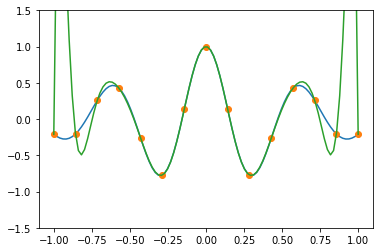

In [78]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

#define f
def f(x):
    return np.cos(10 * x) / (3 * x **2 + 1)

#plot f
xx=np.linspace(-1.0,1.0, num=100) 
plt.plot(xx,f(xx))
plt.axis([-1.1,1.1,-1.5,1.5])

N=15

#set up the equations for the polynomial coefficients ae for equally spaced points and solve
xe=np.linspace(-1,1,N)
plt.plot(xe,f(xe),"o")
AE=np.vander(xe)
fe=f(xe)
ae=la.solve(AE,fe)

#plot the polynomial
pe=np.polyval(ae,xx)
plt.plot(xx,pe)

#condition number
print(np.linalg.cond(AE))



Here is the code for the Chebyshev case

inf


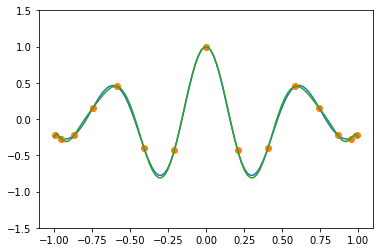

In [79]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

#define f
def f(x):
    return np.cos(10 * x) / (3 * x **2 + 1)

#plot f
xx=np.linspace(-1.0,1.0, num=100) 
plt.plot(xx,f(xx))
plt.axis([-1.1,1.1,-1.5,1.5])

N=15

#set up the equations for the polynomial coefficients ac for equally spaced points and solve
k=np.arange(1,N+1)
xc=np.cos(np.pi*(2*k-1)/(2*N))
plt.plot(xc,f(xc),"o")
AC=np.vander(xc)
fc=f(xc)
ac=la.solve(AC,fc)

#plot the polynomial
pc=np.polyval(ac,xx)
plt.plot(xx,pc)

#condition number
print(np.linalg.cond(AC))
